In [11]:
import pandas_datareader as pdf
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [2]:
fed_data1 = pdf.get_data_fred(['UNRATE', 'FEDFUNDS', 'INDPRO', 'W823RC1', 'POILBREUSDM', 'CBBTCUSD'])
fed_data1.describe()

,UNRATE,FEDFUNDS,INDPRO,W823RC1,POILBREUSDM,CBBTCUSD
count,59.000000,59.000000,59.000000,58.000000,55.000000,1824.000000
mean,5.047458,1.063220,100.375137,1037.772414,60.676663,18021.898684
std,2.321070,0.904785,3.910134,71.217874,13.400089,17674.364807
min,3.500000,0.050000,84.201800,921.600000,23.337273,1298.440000
25%,3.800000,0.090000,99.727000,974.925000,52.960497,6448.165000
50%,4.100000,1.150000,101.356100,1037.650000,63.602174,9284.045000
75%,5.600000,1.870000,102.613550,1090.250000,70.273715,32832.442500
max,14.700000,2.420000,104.585300,1197.000000,83.650000,67510.060000


In [3]:
fed_data2 = pdf.get_data_fred(['DCOILBRENTEU'])


In [4]:
covid_data = pd.read_csv('covid.csv', sep = ',')
covid_df = pd.DataFrame(covid_data).set_index('DATE')
covid_df.index = pd.to_datetime(covid_df.index)
covid_df.index.name = 'DATE'


In [9]:
merge_df = [fed_data1, fed_data2, covid_df]
new_df = covid_df.merge(fed_data1, left_index=True, right_index=True).dropna()
new_df.describe()

,Confirmed,UNRATE,FEDFUNDS,INDPRO,W823RC1,POILBREUSDM,CBBTCUSD
count,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,1.897179e+07,7.000000,0.174545,97.203036,1096.627273,55.226550,28043.509545
std,1.620868e+07,2.897289,0.336802,4.740886,19.515834,17.370975,19324.966047
min,8.000000e+00,3.500000,0.050000,84.201800,1066.600000,23.337273,6719.390000
25%,3.170974e+06,5.250000,0.080000,96.018450,1078.800000,41.517460,10308.945000
50%,1.709776e+07,6.100000,0.085000,98.723600,1097.300000,54.777464,24077.220000
75%,3.317304e+07,7.650000,0.090000,100.333450,1112.250000,69.526515,46063.195000
max,4.614922e+07,14.700000,1.580000,102.037400,1129.700000,83.650000,60950.000000


In [10]:
reg4 = 'W823RC1~UNRATE+FEDFUNDS+INDPRO+Confirmed+CBBTCUSD+POILBREUSDM'
reg4output=smf.ols(reg4, new_df).fit()
print(reg4output.summary())

                            OLS Regression Results                            
Dep. Variable:                W823RC1   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     176.4
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           4.85e-13
Time:                        18:03:12   Log-Likelihood:                -49.098
No. Observations:                  22   AIC:                             112.2
Df Residuals:                      15   BIC:                             119.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1036.1117     66.901     15.487      

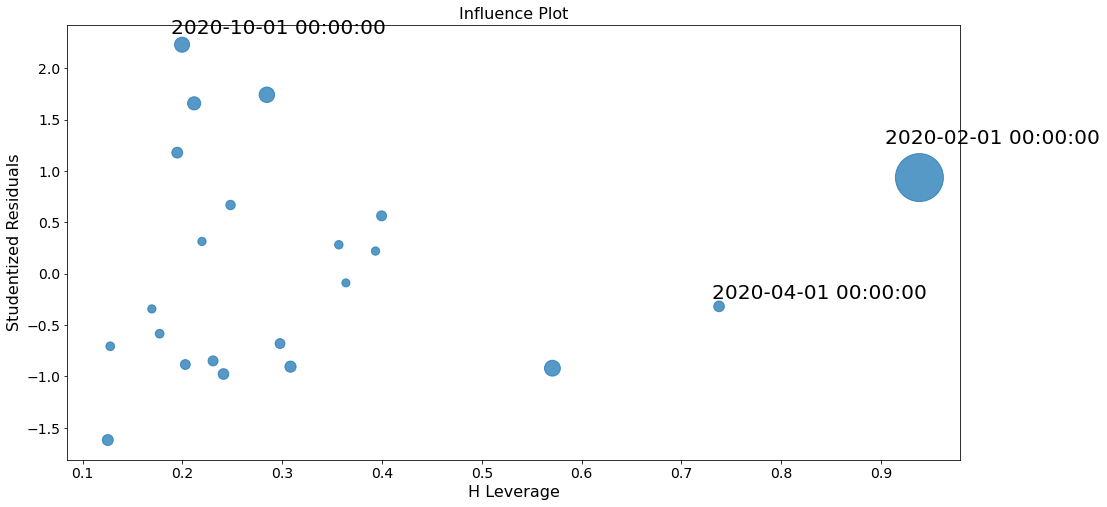

In [12]:
fig = sm.graphics.influence_plot(reg4output, criterion="cooks")